# waves - testing

In [7]:
#import math
from scipy import io
import scipy.signal
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack
import scipy.integrate
import pandas as pd
from IPython.display import display
import time
import matplotlib.colors as colors
import random
import pandas as pd
import glob
import os

**main variables**
<br> f - main frequency (Hz)
<br> full_f - the entire time-frequency function (Hz) ("x" as x axis)
<br> frangemax - x axis length of Fourier-transform, note, that this does not affect Fourier calculation
<br> samples - sample points of the first graph
<br> s_rate - sample rate (Hz)
<br> amp - amplitude of signal
<br> randamp - amplitude of noise (random noise)
<br> <br> First, we create our signal and noise. In deafult: a sine wave, and a white noise.
<br> Or import one in.

In [127]:
#%%script false
f=100
t=4
samples=20000 #random.randint(400,50000)
s_rate=4000
t=samples/s_rate
randamp=0#1
nyquist=samples/2/t
frangemax=200#nyquist

xf=np.linspace(0.0, frangemax, int(frangemax*t+1))
x = np.linspace(0.0, t, samples)
full_f=f+x/100000#*16#(f-60/((x/1.5)+1.8))*7-30  #np.linspace(f, f, samples) #      f+x*0.01     15+10*np.sin(np.pi*x)#   
full_f_phase = np.zeros(samples)
for i in range (samples):
    full_f_phase[i]=np.sum(full_f[:i])*2/s_rate
    
amp=x/10+10#np.sin(np.pi*x/t)#*(0.2*abs(np.sin(2*np.pi*x)+1)+0.1)#0.4+x/t*0.6
shot = "testing"

s_det = amp*np.sin(full_f_phase*np.pi) #Changing freqency. old way: *(1+(x*10**2)**0.5)
s_noise = (np.random.rand(samples)-0.5)*randamp
s=(s_det+s_noise)#+200000#/(0.5*randamp+amp.max())*amp.max()
print (samples)
#f1=f; f2=f/np.sqrt(2); s=np.sin(f1*2*np.pi*x)+np.sin(f2*2*np.pi*x)

20000


In [128]:
%%script false
path ='C:\\Users\\Marci\\Documents\\transientwaves\\imputdata\\in\\'#pc
#path ='C:\\Users\\win10\\Downloads\\transient-waves\\inputdata\\in\\'#laptop

for filename in glob.glob(os.path.join(path, '*.sav')):
    sav1 = io.readsav(filename, python_dict = True)
    print('Loaded: '+filename)
    print('\n')

Couldn't find program: 'false'


In [129]:
%%script false

shot_i=0
#print(sav1)
s=np.array(sav1['data'])#[shot_i]
x=np.array(sav1['timeax'])
#print("\n", sav1['channels'])
print("\n", s)
#print("\n", sav1['channels'][shot_i])
sxr_name=str(sav1['channels'][shot_i])[2:4]+'R'+str(sav1['channels'][shot_i])[5:-1]
shot=os.path.basename(filename)[:4]+' '+os.path.basename(filename)[5:10]+', '+sxr_name#str(sav1['channels'][shot_i])[2:-1]
print("\n",shot)


#C:\\Users\\win10\\Downloads\\transient-waves\\inputdata\\AUGD_34924_2208_2238_Loaded-with-MTR.sav - nullközepű 
#AUGD_34924_J051_240_245_Loaded-with-MTR.sav - nem nullközepű SXR
#AUGD_28881_Loaded-with-MTR.sav - toroidális mágneses tekercs AUGD_28881_Loaded-with-MTR.sav
#C:\\Users\\Marci\\Documents\\transientwaves\\imputdata\\AUGD_34924_2208_2238_Loaded-with-MTR.sav

Couldn't find program: 'false'


In [130]:
#%%script false
min_t=0#1.9
max_t=t#2.2

s = s.astype(float)
x = x.astype(float)
samples=s.size
#full_f = np.zeros(samples)
t=max(x)-min(x)
nyquist=samples/2/t
#frangemax=nyquist#250000#
xf=np.linspace(0.0, frangemax, frangemax*t+1)
s_rate=x.size/t

t=max_t-min_t
min_x=int(s_rate*min_t)
max_x=int(s_rate*max_t)
samples=max_x-min_x

x=x[min_x:max_x]
s=s[min_x:max_x]

print(max_t)
print(frangemax)
print(x.size)

5.0
200
20000


C:\Users\win10\Anaconda3\Lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


The widget below controls the wisible range of the chart under it. Note that this is only for visualisation, the program calculates with the whole 0 - t range. The zooming is exponential. Value 0 displays the whole range.

In [131]:
#%%script false
usewidgets=1
import ipywidgets as widgets
view=widgets.FloatSlider()
if usewidgets==1:
    display(view)
else:
    view.value=0

FloatSlider(value=0.0)

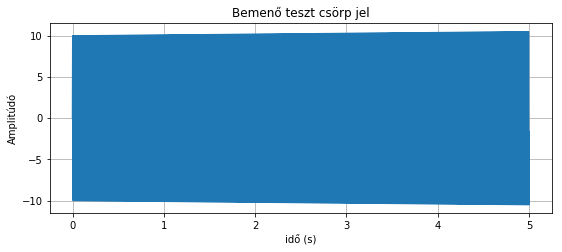

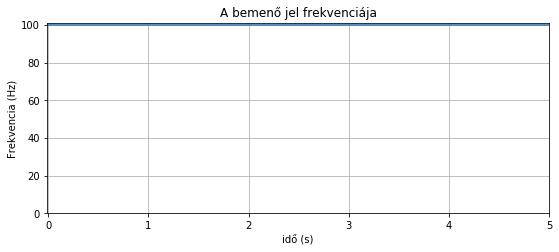

100.00005


In [132]:
#%%script false
#plt.figure(figsize=(14,5))
#plt.title(shot+' szonda jele')
#plt.plot(x,s)
#yaxismax=1/2**(view.value/12)
#plt.xlim(min_t,max_t-(max_t-min_t)*view.value/100.6)
#plt.ylabel('radiális mágneses tér változás (T/s)')
#plt.xlabel('idő (s)')
#plt.savefig(shot+' in.pdf')
#plt.show()

plt.figure(figsize=(9,3.5))
plt.title('Bemenő teszt csörp jel')
plt.plot(x,s)
#yaxismax=1/2**(view.value/12)
#plt.axis([0,t,min(s),max(s)])
plt.ylabel('Amplitúdó')
plt.xlabel('idő (s)')
plt.grid(True)
#plt.savefig(shot+' s_in_z.pdf')
plt.show()

plt.figure(figsize=(9,3.5))
plt.title("A bemenő jel frekvenciája")
plt.plot(x,full_f)
yaxismax=1/2**(view.value/12)
plt.xlim(-0.01,t/(1.05**view.value))
plt.ylim(0,f+1)
plt.ylabel('Frekvencia (Hz)')
plt.xlabel('idő (s)')
plt.grid(True)
#plt.savefig('freq_in.pdf')
plt.show()

print(full_f[-1])

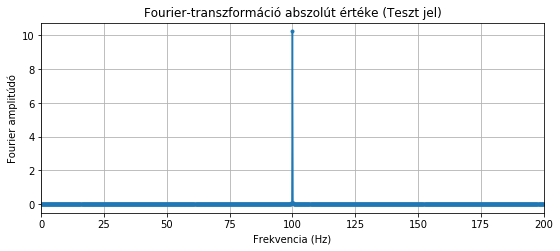

In [135]:
#%%script false
yf = scipy.fftpack.fft(s)
yfabs=np.abs(yf[:xf.size])/samples*2
#yfabs=(np.abs(yf[:frangemax])*np.abs(yfimag)*np.abs(yfreal))

plt.figure(figsize=(9,3.5))
plt.plot(xf,yfabs,".-")
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax))
plt.xlabel('Frekvencia (Hz)')
plt.ylabel('Fourier amplitúdó')
#plt.xscale('log')
plt.title('Fourier-transzformáció abszolút értéke (Teszt jel)')
plt.grid(True)
plt.savefig('t_fft2.pdf')
plt.show()

#print(yfang[f*int(t)+1])
#print(yfang[f*int(t)])
#print(yfang[f*int(t)-1])

## Short-time Fourier transform

Coherent gain of window: 0.18795013305919642
a
9.628514286924541e-21
15498799.05937216
300


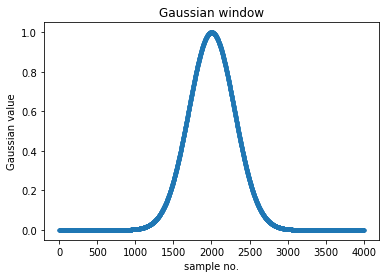

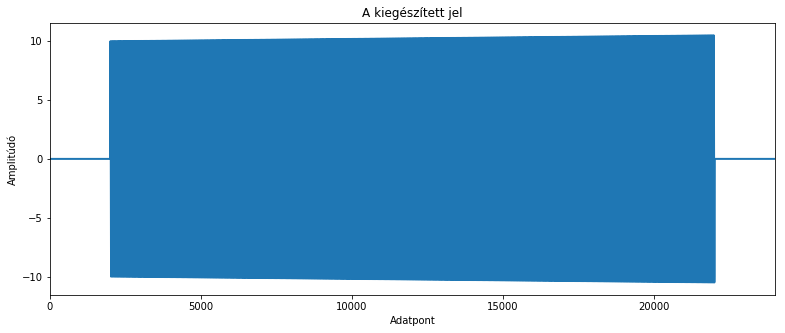

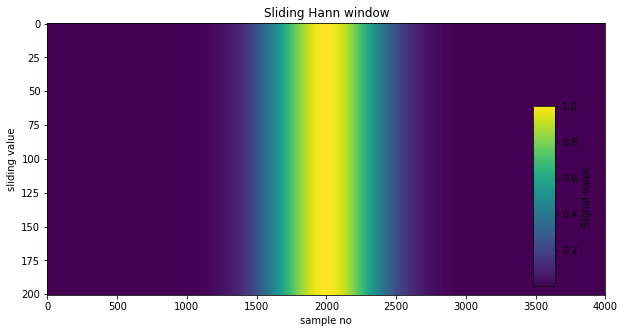

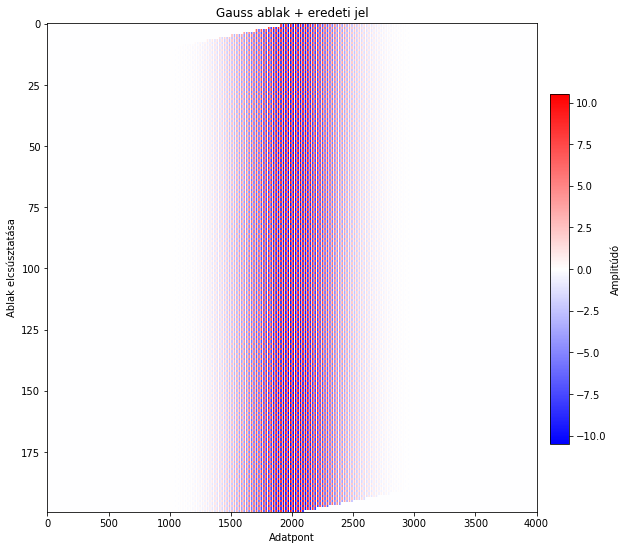

In [153]:
t0=time.time()
win_r = 2000 #1000
d_win=100#random.randint(200,300)
std=300 #150
win_base = scipy.signal.gaussian(2*win_r+1, std=std)#np.wining(2*win_r+1)
coherent_gain=np.sum(win_base)/(2*win_r+1)
print("Coherent gain of window:", coherent_gain)

plt.plot(win_base,".-")
plt.title('Gaussian window')
plt.xlabel('sample no.')
plt.ylabel('Gaussian value')
#plt.show()

z_padded_s = np.zeros (samples+2*win_r)
z_0=z_padded_s
z_padded_s[win_r:-win_r] = s
z_padded_s[0:win_r]=np.average(z_padded_s[win_r+1:2*win_r])
z_padded_s[-win_r:]=np.average(z_padded_s[-2*win_r:-win_r-1])
x_win=np.linspace(0.0, t+(2*win_r/s_rate), samples+2*win_r)

plt.figure(figsize=(13,5))
plt.plot(z_padded_s,"-",linewidth = 2)#x_win,idő (s),max(x_win)
plt.xlim((0,samples+2*win_r))
plt.title('A kiegészített jel')
plt.xlabel('Adatpont')
plt.ylabel('Amplitúdó')
plt.savefig('sxr2_p.pdf')
#plt.show()

win = np.zeros((int(samples/d_win+1), 2*win_r+1))
for i in range(int(samples/d_win+1)):
    win [i]=win_base

plt.figure(figsize=(10,5))
plt.imshow(win,aspect='auto')
plt.title('Sliding Hann window')
plt.xlabel('sample no')
plt.ylabel('sliding value')
#plt.subplots_adjust(right=0.95)
cax = plt.axes([0.8, 0.15, 0.03, 0.5])
plt.colorbar(cax=cax).set_label('Signal value')
#plt.show()

z_win = np.zeros((int(samples/d_win+0.9), win_r*2+1))
for i in range(int(samples/d_win+0.9)):
    if i<1000001:
        z_win[i] = win[i] * (z_padded_s [d_win*i:d_win*i+win_r+win_r+1]-np.average(z_padded_s [d_win*i:d_win*i+win_r+win_r+1]))
    #z_win[i] = win[i] * (z_padded_s [d_win*i:d_win*i+win_r+win_r+1])

plt.figure(figsize=(9,9))
plt.imshow(z_win,aspect='auto',cmap='bwr')#, extent=(min_t*s_rate/d_win,max_t*s_rate/d_win,max_t*s_rate,min_t*s_rate)
plt.title('Gauss ablak + eredeti jel')
plt.xlabel('Adatpont')
plt.ylabel('Ablak elcsúsztatása')
plt.subplots_adjust(right=0.88)
cax = plt.axes([0.90, 0.23, 0.03, 0.54])
plt.colorbar(cax=cax).set_label('Amplitúdó')
plt.savefig('z_win.pdf')
#plt.show()

z_win_fft = np.zeros((int(samples/d_win+0.9), win_r*2+1))
for i in range(int(samples/d_win+0.9)):
    if i % 1000 == 0:
        print('a')
    if i<1000001:
        z_win_fft[i] = np.abs(scipy.fftpack.fft(z_win[i]))  
t1=time.time()

print(z_win_fft.min()**2)
print(z_win_fft.max()**2)
print(std)

z_win_fft_cutted = (z_win_fft.T)**2

In [137]:
%%script false
z_win_fft_cutted = np.zeros((int(frangemax*(2*win_r+1)/s_rate), int(samples/d_win)))
for i in range(int(samples/d_win)):
    for j in range(int(frangemax*(2*win_r+1)/s_rate)): #int(frangemax*max(x_hann))
        z_win_fft_cutted [j][i] = z_win_fft [i][j]**2

        
print(z_win_fft.shape)
print(z_win_fft_cutted.shape)
#print(z_spy_stft.shape)
#print(z_spy_stft_cutted.shape)
#print(z_win_fft.max()/abs(z_spy_stft.max()))

Couldn't find program: 'false'


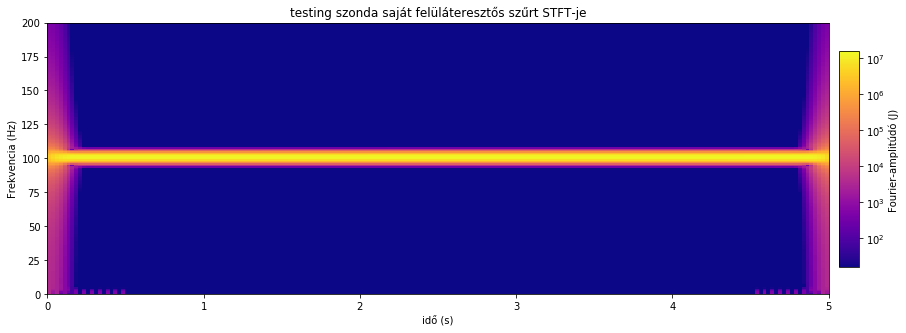

2000.0 200


In [138]:
#print(z_win_fft_cutted)
##### %%script false
fft_max = z_win_fft_cutted.max()
colornorm=colors.LogNorm(vmin=fft_max*10**(-6), vmax=fft_max)#40000000#10
logax = np.linspace(int(np.log10(fft_max)-6),int(np.log10(fft_max)),7)
logax = 10**logax
fig, ax = plt.subplots(figsize=(14,5))
#extent=[0,t-(2*win_r/s_rate),0,frangemax/t],
#plt.figure(figsize=(15,10))
#ax.plot(x,np.abs(full_f),color='g',linewidth=3,linestyle='dashed',alpha=0.6)#img = ax.
img = plt.imshow(z_win_fft_cutted,cmap='plasma',  aspect='auto', extent=[min_t,max_t,2*nyquist,0], norm=colornorm)#interpolation='gaussian',*30000000/4
#plt.title('39424-es kisülés, J051-es szonda STFT-je')
plt.title(shot+' szonda saját felüláteresztős szűrt STFT-je')
#plt.title('AUGD 34924, B31-40-es szonda STFT-je')
plt.ylabel('Frekvencia (Hz)')
plt.xlabel('idő (s)')#('time (s)')
plt.ylim(0,frangemax)
#plt.xlim(1.9,2.4)
plt.subplots_adjust(right=0.90)
#plt.gca().invert_yaxis()
cbar=plt.colorbar(img,cax=plt.axes([0.91, 0.2, 0.02, 0.6]),ticks=None)
cbar.set_label('Fourier-amplitúdó (J)')
#plt.axis([2.13,2.15,min(s),20000])
cbar.set_ticks(logax)
plt.savefig(shot+' '+str(min_t)+'-'+str(max_t)+' stft.pdf')#34924_40
plt.show()

print(nyquist,frangemax)

200.0
3999.1
19950.12468827929
65.61419024065383


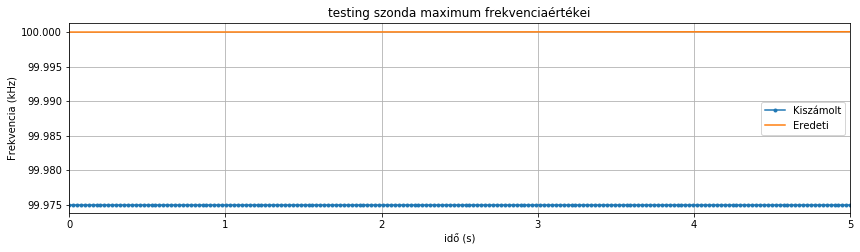

(200,)


In [143]:
#%%script false
#ridge_no = 1
print(samples/d_win)

print(s_rate-0.9)
print(nyquist/((2*win_r+1)/s_rate-0.9))
ridge_d=50#00#50# #windth of search if rige is lost
ridge_d2=15#00   #width of search if rige is followed
ridge_start=f#40000#2#
ridge = np.zeros(int(samples/d_win+0.9))  #position (frequency) of the ridge
ridge_h = np.zeros(int(samples/d_win+0.9)) #height of the ridge
maxi=z_win_fft.max()/60 # minimum treshold
print(maxi)

for i in range(int(samples/d_win+0.9)):
    ridgeval=0  #max(z_spy_stft[i][:])
    if (i==0) or (ridge[i-1]==0):
        for j in range(int(ridge_d*(2*win_r+1)/(s_rate-0.9))):
            j2=j+int((ridge_start)*(2*win_r+1)/(s_rate-0.9))
            if ridgeval < z_win_fft[i][j2]:
                ridgeval=z_win_fft[i][j2]
                ridge[i]= j2
    else:
        for j in range(int(ridge_d2*(2*win_r+1)/(s_rate-0.9))):
            j2=int(j+ridge[i-1]-(ridge_d2/2)*(2*win_r+1)/(s_rate-0.9))
            if ridgeval < z_win_fft[i][j2]:
                ridgeval=z_win_fft[i][j2]
                ridge[i]= j2
                #print(j2, z_spy_stft[j2][i])
    if ridgeval<(maxi):
        ridgeval =0
        ridge [i]=0
    ridge_h[i]=ridgeval#**(1/2)
    #print(i, ridge [i])
    #print (i,"  ",ridge[i],"\t", ridgeval,"\t", z_spy_stft[i][int(ridge[i])])

ridge=ridge*(s_rate/(2*win_r+1))

#proc_x=np.linspace(min_t,max_t,np.size(ridge))
ridge[ ridge==0 ] = np.nan
plt.figure(figsize=(14,3.5))
plt.title(shot+' szonda maximum frekvenciaértékei')
plt.plot(np.linspace(min_t,max_t,np.size(ridge)),ridge,'.-',x,full_f)
plt.grid(True)
plt.legend(('Kiszámolt', 'Eredeti'))
#yaxismax=1/2**(view.value/12)
plt.xlim(min_t,max_t)
#plt.ylim(ridge_start/1100,)
#plt.ylim(0,200)
#plt.xlim(0.89,0.91)
plt.ylabel('Frekvencia (kHz)')
plt.xlabel('idő (s)')
plt.savefig(shot+' f_max.pdf')
plt.show()
#print(z_spy_stft.shape)
print(ridge.shape)

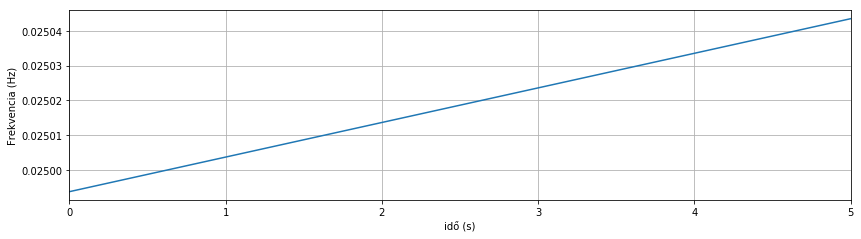

0.02501862780591914

In [144]:
#%%script false
plt.figure(figsize=(14,3.5))
x_ridge=np.linspace(min_t,max_t,np.size(ridge))
diff_ridge=full_f[0::d_win]-ridge#15+10*np.sin(np.pi*x_ridge)
plt.plot(x_ridge,abs(diff_ridge))#/ridge
plt.ylabel('Frekvencia (Hz)')
plt.xlabel('idő (s)')
plt.grid(True)
plt.xlim(min_t,max_t)
#plt.ylim(0,4)
#plt.savefig('t_diff.pdf')
plt.show()
#((1/(np.size(ridge)-1))*sum((diff_ridge/ridge)**2))**(1/2)
np.average(abs(diff_ridge))

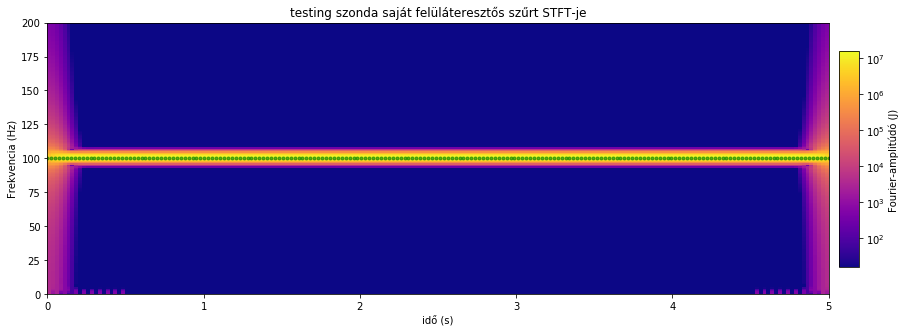

In [145]:
fig, ax = plt.subplots(figsize=(14,5))
#ax.plot(x,np.abs(full_f),color='g',linewidth=3,linestyle='dashed',alpha=0.6)#img = ax.
ax.plot(np.linspace(min_t,max_t,np.size(ridge)),ridge,'.',color='g',alpha=0.6)
img = plt.imshow(z_win_fft_cutted,cmap='plasma',  aspect='auto', extent=[min_t,max_t,2*nyquist,0], norm=colornorm)#interpolation='gaussian',*30000000/4
#plt.title('39424-es kisülés, J051-es szonda STFT-je')
plt.title(shot+' szonda saját felüláteresztős szűrt STFT-je')
#plt.title('AUGD 34924, B31-40-es szonda STFT-je')
plt.ylabel('Frekvencia (Hz)')
plt.xlabel('idő (s)')#('time (s)')
plt.ylim(0,frangemax)
#plt.xlim(1.9,2.4)
plt.subplots_adjust(right=0.90)
#plt.gca().invert_yaxis()
cbar=plt.colorbar(img,cax=plt.axes([0.91, 0.2, 0.02, 0.6]),ticks=None)
cbar.set_label('Fourier-amplitúdó (J)')
#plt.axis([2.13,2.15,min(s),20000])
cbar.set_ticks(logax)
plt.savefig(shot+' '+str(min_t)+'-'+str(max_t)+' stft.pdf')#34924_40
plt.show()

0.9997500624843789


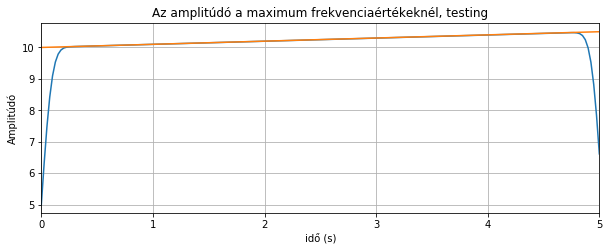

(200,)


In [154]:
print((s_rate/(2*win_r+1)))

ridge_h[ ridge_h==0 ] = np.nan
#print(maxi**(1/2))
plt.figure(figsize=(10,3.5))
plt.title('Az amplitúdó a maximum frekvenciaértékeknél, '+shot)#, AUGD 34924 J051-es szonda
plt.plot(np.linspace(min_t,max_t,np.size(ridge_h)),ridge_h*2/(2*win_r+1)/coherent_gain,x,amp,'-',markersize=1)#,x,3*abs(np.sin(2*np.pi*x))+2,
plt.grid(True)
plt.xlim(min_t,max_t)
#plt.xlim(0.89,0.91)
#plt.ylim(maxi**(1/2)/2,max(ridge_h)*1.05)
plt.ylabel('Amplitúdó')
plt.xlabel('idő (s)')
#plt.yscale("log")
plt.savefig(shot+'_amp.pdf')
plt.show()
print(ridge.shape)

amp_diff=np.zeros(int(samples/d_win+0.9))#
for i in range(int(samples/d_win+0.9)):
    amp_diff[i]=np.sqrt(ridge_h[i])-3*abs(np.sin(2*np.pi*x[20*i]))

## Small observations
Now, we make histograms of the noise and the entire signal. The difference - if the input is a single frequency - only one point. In general: it is the signal. We will fit a half gaussian onto these, and see, how likely it is, that the difference (signal) is produced by the noise.

In [78]:
%%script false
hist_bins = np.linspace(0, 50000, 50)

"""plt.figure(figsize=(13,5))
plt.hist(yf_noise,hist_bins, density=True)
plt.title('Distribution of Fourier transformation (non-deterministic component)')
plt.ylabel('Frequency (%)')
plt.xlabel('Fourier amplitude')
plt.grid(True)
plt.show()"""

plt.figure(figsize=(13,5))
plt.hist(yfabs, hist_bins, density=True)
plt.title('Distribution of entire Fourier transformation')
plt.ylabel('Frequency (%)')
plt.xlabel('Fourier amplitude')
plt.yscale('log')
plt.grid(True)
plt.show()

Couldn't find program: 'false'


In [79]:
%%script false
plt.figure(figsize=(13,5))
plt.acorr(yfabs, maxlags=1400)
plt.axis([-1,1400,0,1])
#plt.xlim((0,frangemax))
plt.xlabel('$\Delta$ frequency (Hz)')
plt.ylabel('Autocorrelation value')
#plt.xscale('log')
plt.title('Autocorrelation of fourier value')
plt.grid(True)
plt.show()

def acf(x):
    result = np.correlate(x, x, mode='full')
    return result[int(result.size/2):]

s_acf=acf(s)
s_acf=s_acf/np.max(s_acf)
s_acf_fft_abs=abs(scipy.fftpack.fft(s))
s_acf_fft_ang=np.angle(scipy.fftpack.fft(s))/np.pi

plt.figure(figsize=(13,5))
plt.plot(x,s_acf)
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim(min_t,max_t)
plt.xlabel('$\Delta$t (s)')
plt.ylabel('Autocorrelation value')
#plt.xscale('log')
plt.title('Autocorrelation of input signal')
plt.grid(True)
#plt.show()

plt.figure(figsize=(13,5))
plt.plot(xf,s_acf_fft_abs[:xf.size])
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax))
plt.xlabel('frequency (Hz)')
plt.ylabel('Fourier value')
#plt.xscale('log')
plt.title("Autocorrelation's Fourier-transform's amplitude")
plt.grid(True)
#plt.show()

plt.figure(figsize=(13,5))
plt.plot(xf,s_acf_fft_ang[:xf.size])
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax))
plt.xlabel('frequency (Hz)')
plt.ylabel('Fourier value')
#plt.xscale('log')
plt.title("Autocorrelation's Fourier-transform's phase")
plt.grid(True)
#plt.show()

Couldn't find program: 'false'


## Tasks
<br> 
<br> Import and evaluate chirps
<br> Reconstruct wave frequencies and amplitudes
<br> Get the radial ?function of several wave types